### What is natural Language Toolkit (NLTK)  :  
- It is a popular open-source Python library used for natural language processing (NLP) tasks such as text analysis, tokenization, stemming, parsing, and semantic reasoning
- NLTK provides a comprehensive suite of libraries and tools that allow users to explore and analyze textual data, build machine learning models, and perform statistical analysis on text data.

### Advantages of NLTK
-  It provides access to over 50 corpora and lexical resources, including the Brown Corpus, the Penn Treebank, and WordNet.
- NLTK offers a range of powerful tools and algorithms for text processing, such as Naive Bayes classifiers, N-gram models, and named entity recognition.

### Objective :  
- Sentiment Analysis with scikit-learn(IMDb Reviews).

### Dataset Info :
- Dataset  contains 40k movie reviews from IMDB.
- There are 2 columns, One being TEXT which contains the review and the other being LABEL which contains O's and 1's ,where 0-NEGATIVE and 1-POSITIVE REVIEW!!

#### Importing utilities libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

#### Check first 5 rows of our data

In [2]:
df=pd.read_csv("./nltk_data/Train.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


#### Train Dataset Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


#### Check whether our labels are balanced or not 

In [4]:
df.groupby("label").count()

,text
label,
0,20019
1,19981


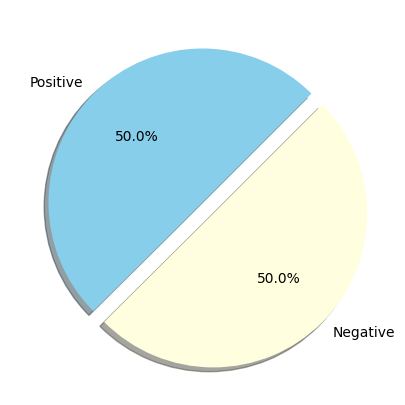

In [5]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'lightyellow']
pos=df[df['label']==1]
neg=df[df['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

####  Generate Vocabulary using scikit-learn CountVectorizer
##### CountVectorizer: Convert a collection of text documents to a matrix of token counts This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
get_feature_names():Array mapping from feature integer indices to feature name.

In [6]:
count=CountVectorizer()
sample=["NLP fascinates me alot, I love NLP"]
bag=count.fit_transform(sample)
bag.toarray()

array([[1, 1, 1, 1, 2]], dtype=int64)

In [7]:
count.get_feature_names_out()

array(['alot', 'fascinates', 'love', 'me', 'nlp'], dtype=object)

#### Perform text preprocessing

In [8]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text 

In [9]:
preprocessor(df.loc[0,'text'][-50:])

'piens subsp sapiens was a huge error of judgment '

####  Importing nltk libraries
- PorterStemmer - It follows an algorithm for suffix stripping i.e it will bring the word to its base meaning like running will be changed to run ,eating will be changed to eat.This is for simplifying the data and removing unnecessary complexities in our text data

In [10]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

#### So before we perform stemming we need to split the sentences into words.

In [11]:
def tokenizer(text):
        return text.split()

In [12]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [13]:
tokenizer("We are learning NLP and Loving it")

['We', 'are', 'learning', 'NLP', 'and', 'Loving', 'it']

#### Words being reduced to their base words. learning->learn and Loving -> love

In [14]:
tokenizer_porter("We are learning NLP and Loving it")

['We', 'are', 'learn', 'nlp', 'and', 'love', 'it']

In [15]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thaku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Check nltk stopwords

In [16]:
stop_words = set(stopwords.words('english'))
print(stop_words)
len(stop_words)

{'it', 'mightn', "you'll", 'me', 'with', 'how', 'd', 'shouldn', "needn't", "shan't", 'your', 'who', 'here', 'have', 'she', 'until', 'doesn', 'does', 'had', 'should', 'after', 'up', 'only', 'ma', 'from', 'same', 'or', 'are', 'but', 'against', 'his', 'when', 'why', 'were', "haven't", 'wouldn', "isn't", 'is', 'its', "should've", 'isn', 'very', 'both', 'while', 'few', 'weren', 'before', "weren't", 'themselves', "didn't", 't', 'each', 'a', 'm', 'too', 'aren', 'again', "you're", 'because', 'other', 're', 'couldn', 'did', "she's", 'yourselves', 'hers', 'out', 'down', 'has', 'am', "that'll", 'below', 'wasn', 'of', 'once', 'and', 'just', 'herself', 'ain', 'do', 'through', 'will', "it's", "mightn't", 'myself', "shouldn't", 'y', 'doing', 'ours', 'further', 'this', 'o', 'most', 'needn', 'as', 'at', 'yours', 'we', 'don', 'between', 'you', 'for', 'shan', "wouldn't", 'to', 'her', 'mustn', 'where', 'some', 'into', 'itself', 'being', "you'd", 'been', 'he', "wasn't", 'not', 'himself', 'such', 'now', 's'

179

Positive words are as follows


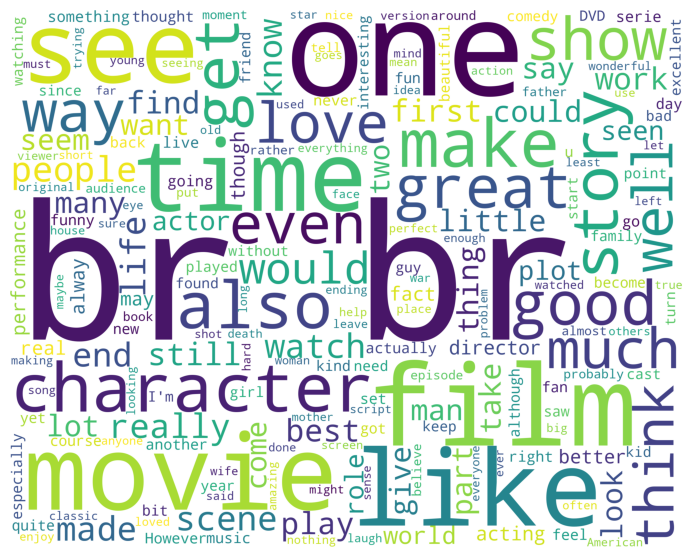

Negative words are as follows


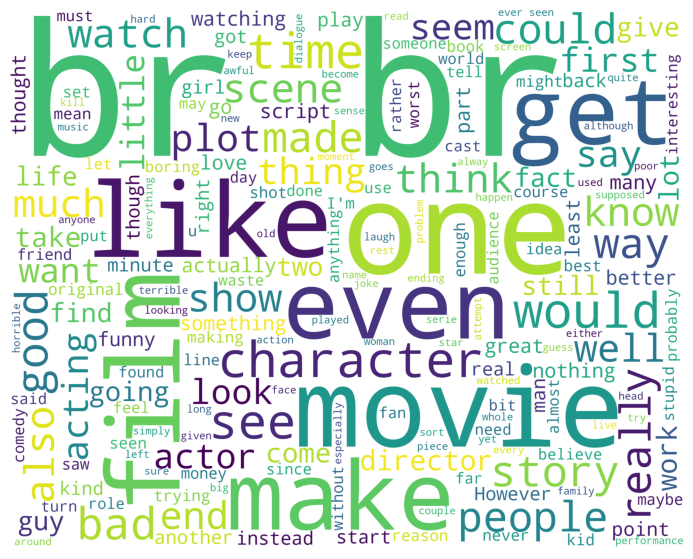

In [17]:
from wordcloud import WordCloud
positivedata = df[ df['label'] == 1]
positivedata =positivedata['text']
negdata = df[df['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop_words,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)

In [19]:
y=df.label.values
x=tfidf.fit_transform(df.text)

E:\TorchText\env\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### train_test_split:Split arrays/matrices into train and test subsets

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [21]:
from sklearn.linear_model import LogisticRegressionCV

clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  5.9min remaining: 11.7min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  6.1min finished


In [22]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88395
